### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [136]:
data = pd.read_csv('data/coupons.csv')

In [137]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [138]:
# Check for Null values in data. 
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [139]:
# Check for duplicates
data.duplicated().value_counts(dropna=False)

False    12610
True        74
dtype: int64

In [141]:
for v in data.columns:
    print(data[v].name)
    print('----------------------')
    print(data[v].value_counts(dropna=False))

destination
----------------------
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
passanger
----------------------
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
weather
----------------------
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
temperature
----------------------
80    6528
55    3840
30    2316
Name: temperature, dtype: int64
time
----------------------
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
coupon
----------------------
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
expiration
----------------------
1d    7091
2h    5593
Name: expiration, dtype: int64
gender
----------------------
Female    6511
Male      6173
Name: gender, dtype: int64
age
-------------------

3. Decide what to do about your missing data -- drop, replace, other...

In [142]:
# From the above observations,

# 1. Car has most nulls, either we could assume the null to be regular car or we could drop the column. 
data.drop(columns=['car'], inplace=True)

In [143]:
# While there are nulls in customer preference data, if there is atleast one of it has data, it can be useful, 
# so check if there are rows with all nulls..
indexToDel = data.query('Bar.isnull() & CoffeeHouse.isnull() & CarryAway.isnull() & RestaurantLessThan20.isnull() & Restaurant20To50.isnull()').index
data.drop(indexToDel , inplace=True)
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                      65
CoffeeHouse             175
CarryAway               109
RestaurantLessThan20     88
Restaurant20To50        147
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [144]:
# Remove duplicates
print(len(data.index))
data.drop_duplicates()
print(len(data.index))

12642
12642


In [155]:
# Set Acceptance to "Accepted/Rejected" for better graphing.
data["CouponAccepted"] = np.where(data["Y"] == 1, "Accepted", "Rejected")
data["CouponAccepted"].value_counts()

Accepted    7181
Rejected    5461
Name: CouponAccepted, dtype: int64

In [159]:
# Direction same and opp could be consolidated to single column direct with same vs opp as values.
data["Direction"] = np.where(data["direction_same"] == 1, "Same", "Opposite")

4. What proportion of the total observations chose to accept the coupon? 



In [164]:
# Check the counts for column Y that has a distribution of total coupon acceptance.
# Change Y to "Accepted/Rejected" to have a better graph labels.
df_coupon_acceptance = data["CouponAccepted"].value_counts().reset_index()
df_coupon_acceptance.columns = ['CouponAccepted', 'counts']
df_coupon_acceptance["percentage"] =  (df_coupon_acceptance['counts'] / df_coupon_acceptance['counts'].sum()) * 100
print(df_coupon_acceptance)

  CouponAccepted  counts  percentage
0       Accepted    7181   56.802721
1       Rejected    5461   43.197279


In [165]:
# About 57% of customers chose to accept the coupon. 
# plotting it in a bar chart..
px.bar(df_coupon_counts, x="CouponAccepted", y ="percentage",
    labels={"index": "Coupon Accepted", "percentage": "Percentage Accepted"},
        title="Proportion of Overall Coupon Acceptance")

5. Use a bar plot to visualize the `coupon` column.

In [182]:
# Calculate acceptance ratio by coupon type and create a bar chart. 
# Doing a group bar chart reveal that 
# 1. CarryOut & Take Away & Small Restaurants (most likely fast foods) have a higher acceptance ratios.
df_coupons = data.groupby('coupon').agg(
    {'CouponAccepted': [lambda x: (x=='Accepted').sum(), 
                        lambda x: (x=='Rejected').sum()]}).reset_index()
df_coupons.columns = ['Coupon', 'AcceptedCount', 'RejectedCount']
px.bar(df_coupons, x="Coupon", y=["AcceptedCount","RejectedCount"], barmode='group')

6. Use a histogram to visualize the temperature column.

In [210]:
# Check values for temperature
data["temperature"].value_counts()

80    6496
55    3830
30    2316
Name: temperature, dtype: int64

In [209]:
px.histogram(data, x="temperature", nbins=10, color="CouponAccepted")

(array([1776.,    0.,    0.,    0.,    0., 2599.,    0.,    0.,    0.,
        1086.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

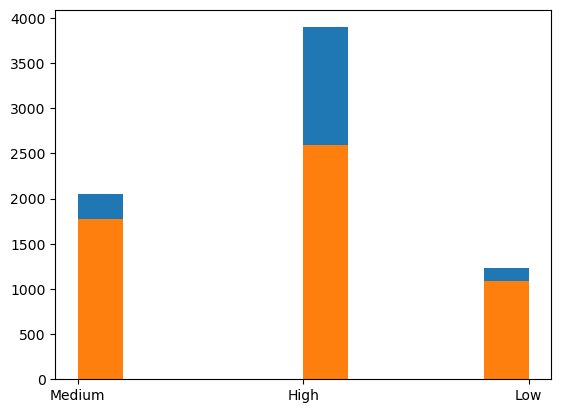

In [208]:
# Since temperature values are pretty static, Replacing temperature values with low/medium/high provides better plotting.
data["TemperatureRange"] = np.where(data["temperature"] == 30, "Low", data["temperature"])
data["TemperatureRange"] = np.where(data["TemperatureRange"] == "55", "Medium", data["TemperatureRange"])
data["TemperatureRange"] = np.where(data["TemperatureRange"] == "80", "High", data["TemperatureRange"])
data["TemperatureRange"].value_counts()

# I also wanted to layer the plot by acceptance instead of stacking.
plt.hist(data=data.query('Y == 1'), x="TemperatureRange")
plt.hist(data=data.query('Y == 0'), x="TemperatureRange")

# This shows the high proportion of acceptance in high temperature


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  